In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## **1. Load and Prepare Data**

In [8]:
df = pd.read_csv("airline-passengers.csv", parse_dates=['Month'],
index_col='Month')
df.rename(columns={'Passengers':'Passengers'}, inplace=True)

## **2. Resample to Quarterly (Daily → Monthly already done)**

In [9]:
quarterly = df.resample('Q').mean()

/tmp/ipython-input-9-3640708358.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').mean()


## **3.Trend/Seasonality Decomposition**

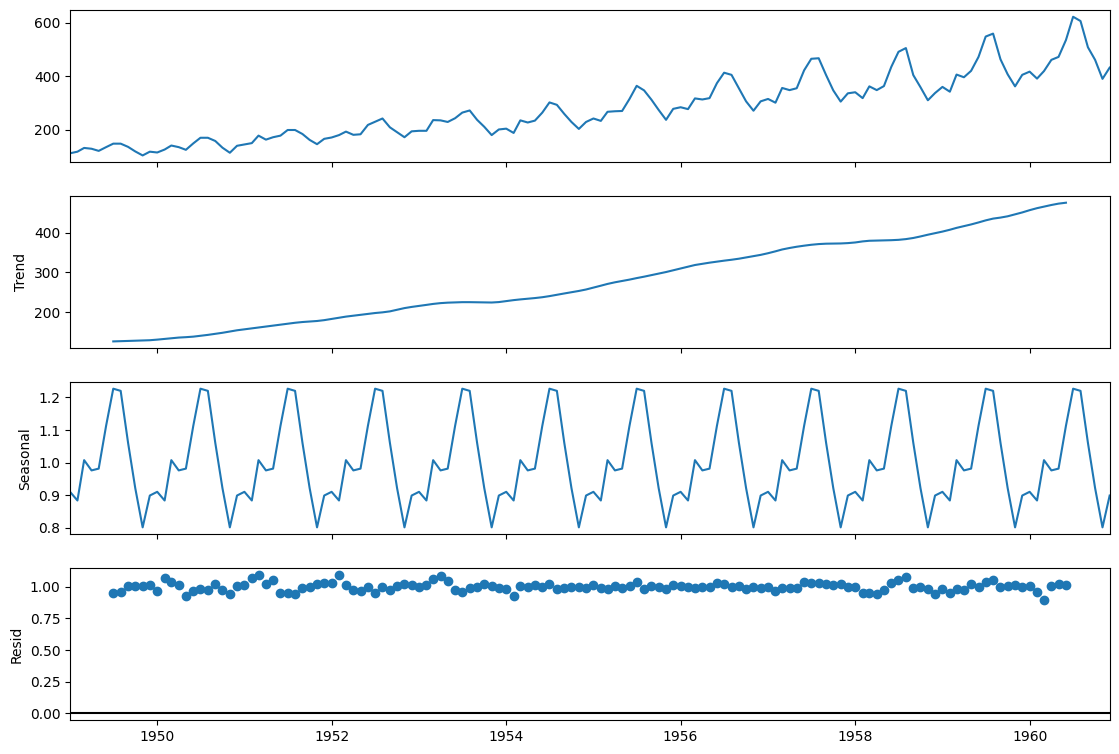

In [10]:
# Decompose into Trend/Seasonal/Residual
decomposition = seasonal_decompose(df, model='multiplicative')
# Plot components

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

## **4.Moving Averages**

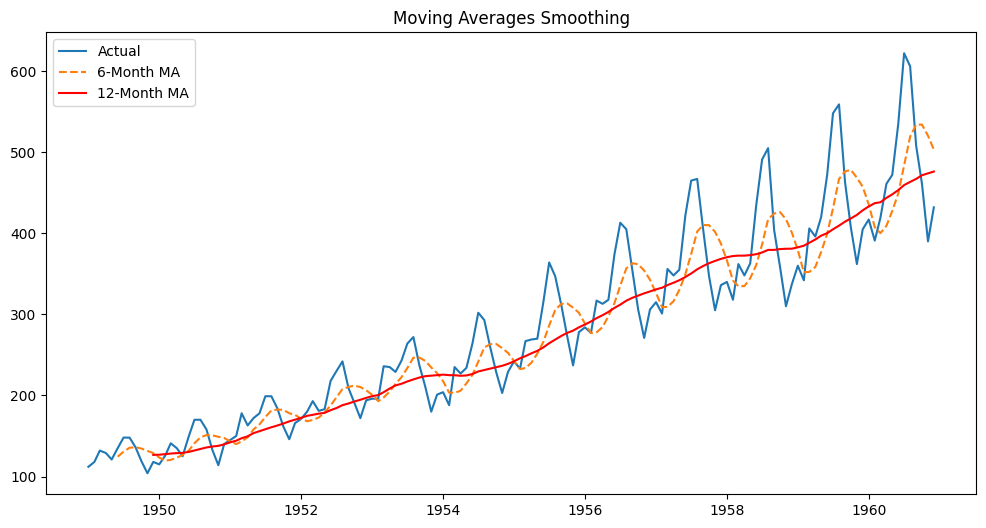

In [11]:
# 6-month and 12-month moving averages
df['MA_6'] = df['Passengers'].rolling(window=6).mean()
df['MA_12'] = df['Passengers'].rolling(window=12).mean()
# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--')
plt.plot(df['MA_12'], label='12-Month MA', color='red')
plt.legend(); plt.title('Moving Averages Smoothing');

## **5.ARIMA Forecasting**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

RMSE: 21.2 passengers


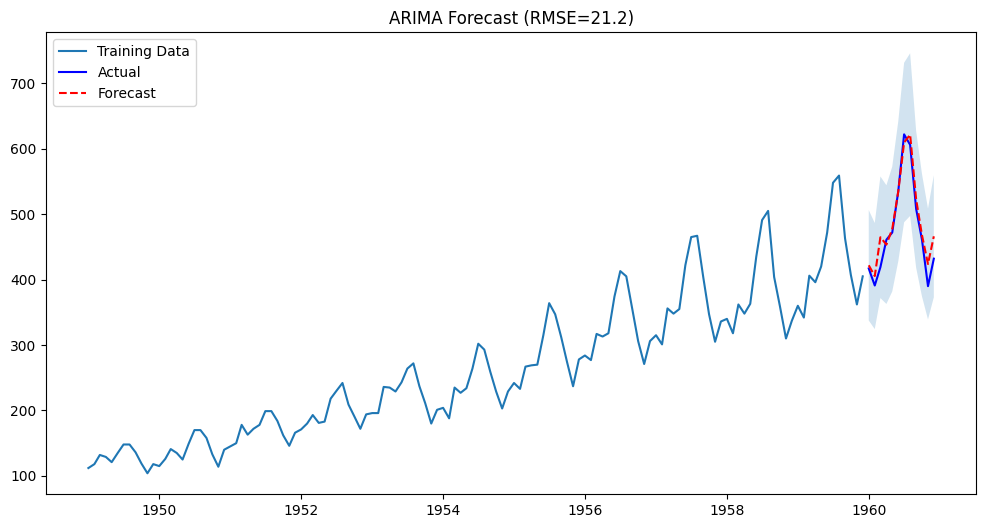

In [12]:
# Split data (last 12 months for testing)
train = df.iloc[:-12]
test = df.iloc[-12:]
# Fit ARIMA(p,d,q)(P,D,Q)s model
model = ARIMA(train['Passengers'], order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
# Forecast and evaluate
forecast = result.forecast(steps=12)
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"RMSE: {rmse:.1f} passengers")

# Plot forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.fill_between(test.index, forecast*0.8, forecast*1.2, alpha=0.2)
plt.title(f"ARIMA Forecast (RMSE={rmse:.1f})"); plt.legend();